In [9]:
from skimage.transform import PolynomialTransform as Poly
import numpy as np
import pandas as pd
from skimage import transform
import skimage.io as io
import matplotlib.pyplot as plt
from PIL import Image
from numpy.testing import assert_almost_equal
from random import random, uniform
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.dpi'] = 300

In [ ]:
src = np.array([[2, 4], [3, 4], [8, 4], [2, 2], [2, 1], [2, 5],
                [3, 7], [4, 6], [2, 6], [1, 7], [1, 4], [6, 5],
                [12, 6], [5, 12], [7, 12], [8, 12]])
dst = np.array([i * 10 + uniform(0, 3) - random() * 3 for i in src])


print(src)
print(dst)
tform = transform.estimate_transform('polynomial', src=src, dst=dst, order=2)

print(tform.params)
print(tform(src))

plt.figure()
plt.scatter(src.T[0], dst.T[0])
plt.scatter(src.T[0], tform(src).T[0])
plt.show()

plt.figure()
plt.scatter(src.T[1], dst.T[1])
plt.scatter(src.T[1], tform(src).T[1])
plt.show()

plt.figure()
plt.scatter(src.T[0], src.T[1])
plt.scatter(dst.T[0], dst.T[1])
plt.scatter(tform(src).T[0], tform(src).T[1])
plt.show()

[[ 294.   530. ]
 [ 955.5  601.5]
 [1489.5  371.5]
 [1421.5 1133.5]
 [ 739.5 2201.5]
 [1407.5  459.5]
 [1281.5  431.5]
 [1213.5  741.5]
 [1529.5 2269.5]
 [1127.5 1771.5]]
[[ 25.64432937  58.67270492]
 [136.82298614  72.70395696]
 [226.21485333  32.4299731 ]
 [213.92286337 159.80599015]
 [100.37388287 340.48135088]
 [212.44867873  47.60834855]
 [190.92352084  42.5912183 ]
 [180.41684788  96.61578561]
 [217.05538426 324.64529365]
 [162.94336396 264.6946449 ]]
[[ 26.138  59.59 ]
 [136.715  71.36 ]
 [226.539  32.023]
 [213.53  158.706]
 [ 99.856 339.594]
 [212.601  48.749]
 [191.539  44.103]
 [178.839  94.9  ]
 [216.937 324.417]
 [164.282 267.115]]
[[ 298.05574315  537.0420251 ]
 [ 954.71717133  593.17486087]
 [1491.93307212  370.10047202]
 [1418.17292592 1125.21264786]
 [ 735.46561606 2194.57927583]
 [1408.37372371  466.24969082]
 [1286.38518991  442.65289128]
 [1202.07184279  727.63546388]
 [1527.89554023 2266.43130307]
 [1138.66124267 1791.62303856]]


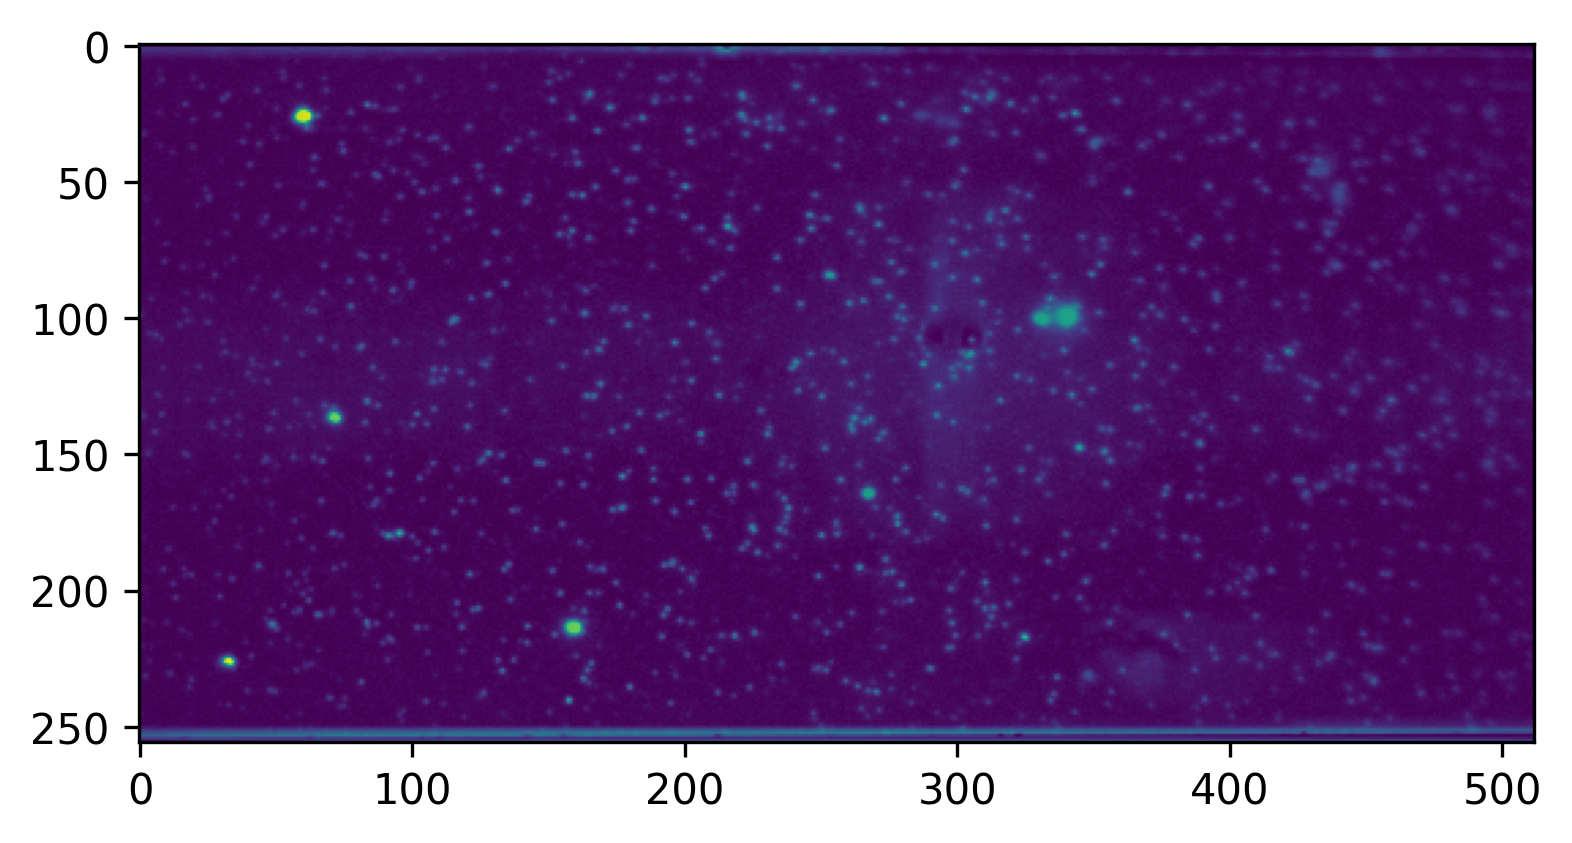

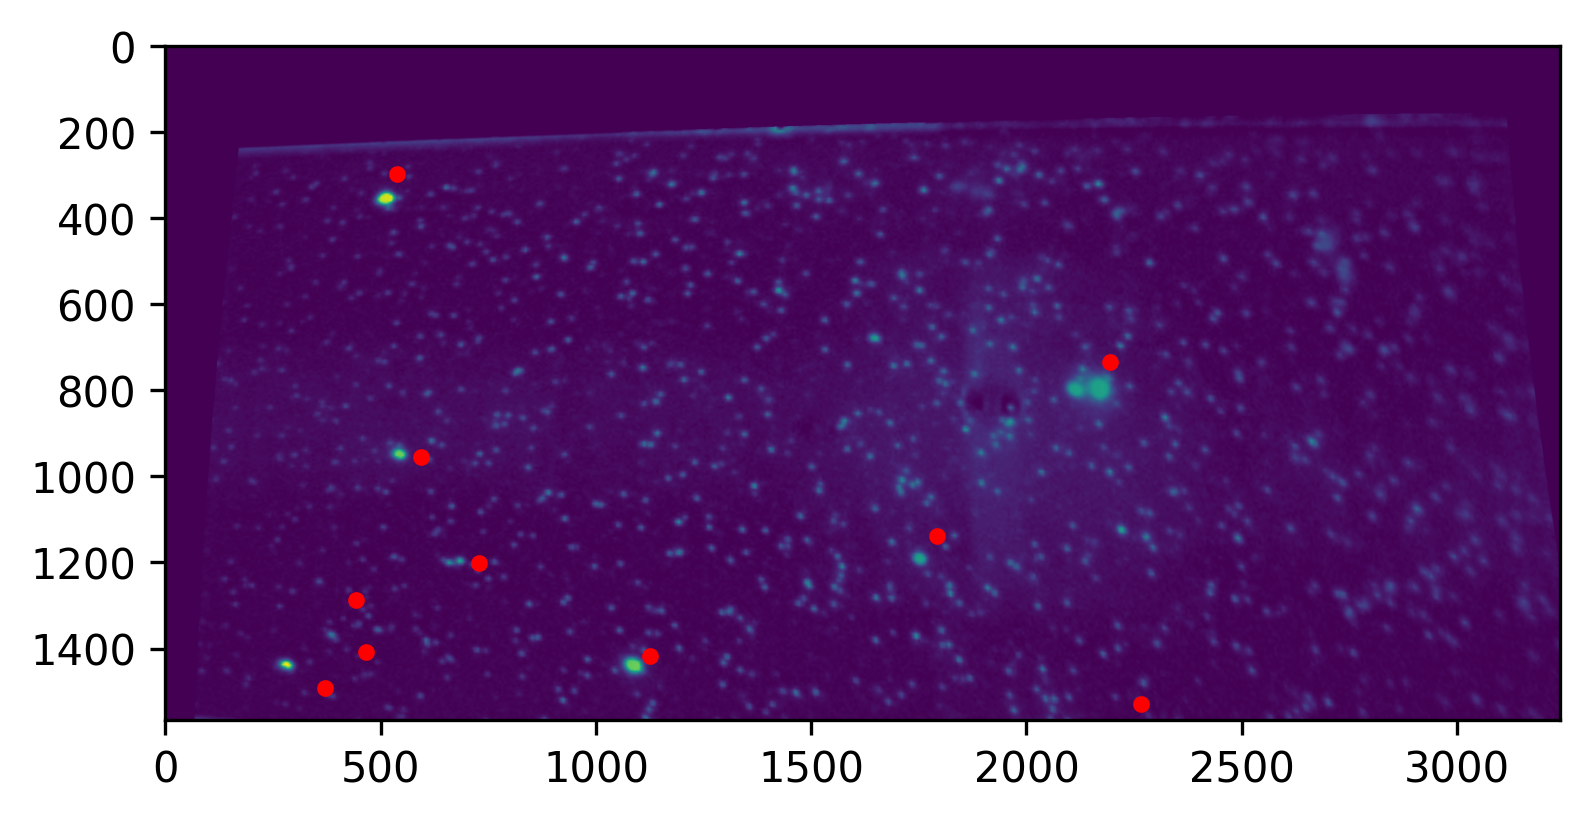

In [129]:
from math import dist


res_tb = pd.read_csv('/Users/qinhanhou/Desktop/DeindlLab/0729Poly/0808/Results_v2.csv')
sample_num = int(len(res_tb) / 2)
# print(np.array(res_tb['Y'][0:sample_num]))
# print(np.column_stack((np.array(res_tb['Y'][0:sample_num]), np.array(res_tb['X'][0:sample_num]))))
dst = np.column_stack((np.array(res_tb['Y'][0:sample_num]), np.array(res_tb['X'][0:sample_num])))
src = np.column_stack((np.array(res_tb['Y'][sample_num:]), np.array(res_tb['X'][sample_num:])))
print(src)
print(tform(src))
print(dst)
# print(len(src))
# print(len(dst))

# tform = transform.PolynomialTransform()
# tform.estimate(src=src, dst=dst, order=2)
tform = transform.estimate_transform('polynomial', src=src, dst=dst, order=2)
tform_2 = transform.estimate_transform('polynomial', src=dst, dst=src, order=2)
print(tform_2(dst))
# assert_almost_equal(tform(src), dst, 1)
# plt.figure()
# plt.scatter(src.T[0], dst.T[0])
# plt.scatter(src.T[0], tform(src).T[0])
# plt.show()

# plt.figure()
# plt.scatter(src.T[1], dst.T[1])
# plt.scatter(src.T[1], tform(src).T[1])
# plt.show()

# plt.figure()
# plt.scatter(src.T[0], src.T[1])
# plt.scatter(dst.T[0], dst.T[1])
# plt.scatter(tform(src).T[0], tform(src).T[1])
# plt.show()

# plt.figure()
# plt.scatter(src.T[1], dst.T[1])
# plt.scatter(src.T[1], tform(src).T[1])
# plt.show()

img = io.imread('/Users/qinhanhou/Desktop/DeindlLab/0729Poly/0808/beads_movie.tif')
plt.figure()
plt.imshow(img)
x_range = 1566
y_range = 3240
# print(tform.params)
warped = transform.warp(img, tform, output_shape=(x_range, y_range))
image = Image.fromarray(warped)
image.save('/Users/qinhanhou/Desktop/DeindlLab/0729Poly/0808/beads_movie_warped.tif')
plt.figure()
plt.plot(tform_2(dst)[:, 1], tform_2(dst)[:, 0], '.r')
plt.imshow(warped)

In [11]:
def residual_cal(src, dst):
    # mse = (np.square(src - dst)).mean(axis=0)
    mse = mean_squared_error(src, dst) / len(src)
    return mse

In [52]:
from tkinter import Y
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self, n_feature, n_output):
        super(NeuralNetwork, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, 8)
        # self.hidden2 = torch.nn.Linear(8, 8)
        self.predict = torch.nn.Linear(8, n_output)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        # x = F.relu(self.hidden2(x))
        x = self.predict(x)
        return x

model = NeuralNetwork(n_feature=2, n_output=2).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# src = np.array([[2, 4], [3, 4], [8, 4], [2, 2], [2, 1], [2, 5],
#                 [3, 7], [4, 6], [2, 6], [1, 7], [1, 4], [6, 5],
#                 [12, 6], [5, 12], [7, 12], [8, 12]]).astype(np.float32)
# dst = np.array([i * 10 + uniform(0, 5) - random() * 5 for i in src])
# tform = transform.estimate_transform('polynomial', src=src, dst=dst, order=2)
# print(tform(src))
# print('=======')

# src_v = torch.from_numpy(src)
# dst_v = torch.from_numpy(dst)
# print(src)
# print(dst)

from math import dist


res_tb = pd.read_csv('/Users/qinhanhou/Desktop/DeindlLab/0729Poly/0808/Results.csv')
sample_num = int(len(res_tb) / 2)
# print(np.array(res_tb['Y'][0:sample_num]))
# print(np.column_stack((np.array(res_tb['Y'][0:sample_num]), np.array(res_tb['X'][0:sample_num]))))
src = np.column_stack((np.array(res_tb['Y'][0:sample_num]), np.array(res_tb['X'][0:sample_num])))
src_v = torch.from_numpy(src.astype(np.float32))
dst = np.column_stack((np.array(res_tb['Y'][sample_num:]), np.array(res_tb['X'][sample_num:])))
dst_v = torch.from_numpy(dst.astype(np.float32))


for t in range(10000):
    prediction = model(src_v)
    loss = loss_fn(prediction, dst_v)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(model(src_v))
print(dst_v)

Using cpu device
tensor([[ 293.8896,  524.6516],
        [ 955.0020,  597.4407],
        [1490.1968,  372.7112],
        [1419.9232, 1127.0636],
        [ 742.6309, 2211.3994],
        [1412.7413,  466.8053],
        [1280.8138,  438.1550],
        [1210.0081,  738.1378],
        [1529.8285, 2262.7354],
        [1124.5072, 1772.4307]], grad_fn=<AddmmBackward0>)
tensor([[ 294.0000,  530.0000],
        [ 955.5000,  601.5000],
        [1489.5000,  371.5000],
        [1421.5000, 1133.5000],
        [ 739.5000, 2201.5000],
        [1407.5000,  459.5000],
        [1281.5000,  431.5000],
        [1213.5000,  741.5000],
        [1529.5000, 2269.5000],
        [1127.5000, 1771.5000]])


In [64]:
from skimage.filters import gaussian
# pos = '246'
# pks_path = '/Volumes/Muscle/0804/Pos' + pos + '/Pos' + pos + '_Green.pks'
# pks = open(pks_path, 'r')
# count = 0
# pk_img = np.zeros(shape=(512, 512))
# number_matrix = np.zeros(shape=(512, 512))
# peak_locations = []

# while True:
#     count += 1
#     line = pks.readline()

#     if not line:
#         break
#     else:
#         split_arr = line.rstrip().split()
#         number = round(float(split_arr[0]))
#         x = round(float(split_arr[1]))
#         y = round(float(split_arr[2]))
#         if x > 256:
#             y = 512 - y
#             x = int(x - 256)
#             peak_locations.append([x, y])

# pks.close()
# print(peak_locations)

peaks_tb = pd.read_csv('/Users/qinhanhou/Desktop/DeindlLab/0729Poly/0808/res_maximum.csv')
sample_num_peaks = int(len(peaks_tb))
# print(np.array(res_tb['Y'][0:sample_num]))
# print(np.column_stack((np.array(res_tb['Y'][0:sample_num]), np.array(res_tb['X'][0:sample_num]))))
peak_locations = np.column_stack((np.array(peaks_tb['Y'][0:sample_num_peaks]), np.array(peaks_tb['X'][0:sample_num_peaks])))

peak_location_v = torch.from_numpy(np.array(peak_locations).astype(np.float32))
model.eval()
res = model(peak_location_v).cpu().detach().numpy()

# print(peak_location_v)


def save_np_img(npimg, path):
    img = Image.fromarray(npimg)
    img = img.convert("L")
    img.save(path, dpi=(300.0, 300.0))


save_path = '/Users/qinhanhou/Desktop/DeindlLab/0729Poly/0808/'

tform_1 = transform.estimate_transform('polynomial', src=src, dst=dst, order=1)
poly_res_1 = tform_1(np.array(peak_locations))

tform_2 = transform.estimate_transform('polynomial', src=src, dst=dst, order=2)
poly_res_2 = tform_2(np.array(peak_locations))


tform_3 = transform.estimate_transform('polynomial', src=src, dst=dst, order=3)
poly_res_3 = tform_3(np.array(peak_locations))


x_range = 1566
y_range = 3240
pk_img = np.zeros((x_range, y_range))
intensity = 1024 * 2
pts_radius = 3
for ele in res:
    y = int(ele[1])
    x = int(ele[0])
    for j in range(0, pts_radius):
        for k in range(0, pts_radius):
            pk_img[min(max(0, x - j), x_range - 1),
                   min(max(0, y - k), y_range - 1)] = 1024 * 2
            pk_img[min(x_range - 1, x + j),
                   min(max(0, y - k), y_range - 1)] = 1024 * 2
            pk_img[min(x_range - 1, x + j),
                   min(y_range - 1, y + k)] = 1024 * 2
            pk_img[min(max(0, x - j), x_range - 1),
                   min(y_range - 1, y + k)] = 1024 * 2
blurred_img = gaussian(pk_img, sigma=3, multichannel=False)
save_np_img(
    blurred_img, save_path + 'transformed_res_NN.png')


pk_img = np.zeros((x_range, y_range))
for ele in poly_res_1:
    y = int(ele[1])
    x = int(ele[0])
    for j in range(0, pts_radius):
        for k in range(0, pts_radius):
            pk_img[min(max(0, x - j), x_range - 1),
                   min(max(0, y - k), y_range - 1)] = 1024 * 2
            pk_img[min(x_range - 1, x + j),
                   min(max(0, y - k), y_range - 1)] = 1024 * 2
            pk_img[min(x_range - 1, x + j),
                   min(y_range - 1, y + k)] = 1024 * 2
            pk_img[min(max(0, x - j), x_range - 1),
                   min(y_range - 1, y + k)] = 1024 * 2
blurred_img = gaussian(pk_img, sigma=3, multichannel=False)
save_np_img(
    blurred_img, save_path + 'transformed_res_poly_1.png')

pk_img = np.zeros((x_range, y_range))
for ele in poly_res_2:
    y = int(ele[1])
    x = int(ele[0])
    for j in range(0, pts_radius):
        for k in range(0, pts_radius):
            pk_img[min(max(0, x - j), x_range - 1),
                   min(max(0, y - k), y_range - 1)] = 1024 * 2
            pk_img[min(x_range - 1, x + j),
                   min(max(0, y - k), y_range - 1)] = 1024 * 2
            pk_img[min(x_range - 1, x + j),
                   min(y_range - 1, y + k)] = 1024 * 2
            pk_img[min(max(0, x - j), x_range - 1),
                   min(y_range - 1, y + k)] = 1024 * 2
blurred_img = gaussian(pk_img, sigma=3, multichannel=False)
save_np_img(
    blurred_img, save_path + '/transformed_res_poly_2.png')


pk_img = np.zeros((x_range, y_range))
for ele in poly_res_3:
    y = int(ele[1])
    x = int(ele[0])
    for j in range(0, pts_radius):
        for k in range(0, pts_radius):
            pk_img[min(max(0, x - j), x_range - 1),
                   min(max(0, y - k), y_range - 1)] = 1024 * 2
            pk_img[min(x_range - 1, x + j),
                   min(max(0, y - k), y_range - 1)] = 1024 * 2
            pk_img[min(x_range - 1, x + j),
                   min(y_range - 1, y + k)] = 1024 * 2
            pk_img[min(max(0, x - j), x_range - 1),
                   min(y_range - 1, y + k)] = 1024 * 2
blurred_img = gaussian(pk_img, sigma=3, multichannel=False)
save_np_img(
    blurred_img, save_path + 'transformed_res_poly_3.png')

# print(model(src_v))
pk_img = np.zeros((x_range, y_range))
for ele in model(src_v):
    y = int(ele[1])
    x = int(ele[0])
    for j in range(0, pts_radius):
        for k in range(0, pts_radius):
            pk_img[min(max(0, x - j), x_range - 1),
                   min(max(0, y - k), y_range - 1)] = 1024 * 2
            pk_img[min(x_range - 1, x + j),
                   min(max(0, y - k), y_range - 1)] = 1024 * 2
            pk_img[min(x_range - 1, x + j),
                   min(y_range - 1, y + k)] = 1024 * 2
            pk_img[min(max(0, x - j), x_range - 1),
                   min(y_range - 1, y + k)] = 1024 * 2
blurred_img = gaussian(pk_img, sigma=3, multichannel=False)
save_np_img(
    blurred_img, save_path + 'transformed_res_nn_beads.png')

pk_img = np.zeros((x_range, y_range))
poly_beads = tform_2(src)
for ele in poly_beads:
    y = int(ele[1])
    x = int(ele[0])
    for j in range(0, pts_radius):
        for k in range(0, pts_radius):
            pk_img[min(max(0, x - j), x_range - 1),
                   min(max(0, y - k), y_range - 1)] = 1024 * 2
            pk_img[min(x_range - 1, x + j),
                   min(max(0, y - k), y_range - 1)] = 1024 * 2
            pk_img[min(x_range - 1, x + j),
                   min(y_range - 1, y + k)] = 1024 * 2
            pk_img[min(max(0, x - j), x_range - 1),
                   min(y_range - 1, y + k)] = 1024 * 2
blurred_img = gaussian(pk_img, sigma=3, multichannel=False)
save_np_img(
    blurred_img, save_path + 'transformed_beads_poly_2.png')

pk_img = np.zeros((x_range, y_range))
poly_beads = tform_3(src)
for ele in poly_beads:
    y = int(ele[1])
    x = int(ele[0])
    for j in range(0, pts_radius):
        for k in range(0, pts_radius):
            pk_img[min(max(0, x - j), x_range - 1),
                   min(max(0, y - k), y_range - 1)] = 1024 * 2
            pk_img[min(x_range - 1, x + j),
                   min(max(0, y - k), y_range - 1)] = 1024 * 2
            pk_img[min(x_range - 1, x + j),
                   min(y_range - 1, y + k)] = 1024 * 2
            pk_img[min(max(0, x - j), x_range - 1),
                   min(y_range - 1, y + k)] = 1024 * 2
blurred_img = gaussian(pk_img, sigma=3, multichannel=False)
save_np_img(
    blurred_img, save_path + 'transformed_beads_poly_3.png')

dst = np.column_stack((np.array(res_tb['Y'][sample_num:]), np.array(res_tb['X'][sample_num:])))
print(dst)
# print('Residual from NN:')
# print(residual_cal(res, dst))
print('Residual from 1-order Poly:')
print(residual_cal(tform_1(src), dst))
print('Residual from 2-order Poly:')
print(residual_cal(tform_2(src), dst))
print('Residual from 3-order Poly:')
print(residual_cal(tform_3(src), dst))

# print(peak_location_v)
# fret_channel = pk_img[257:, :]


[[ 294.   530. ]
 [ 955.5  601.5]
 [1489.5  371.5]
 [1421.5 1133.5]
 [ 739.5 2201.5]
 [1407.5  459.5]
 [1281.5  431.5]
 [1213.5  741.5]
 [1529.5 2269.5]
 [1127.5 1771.5]]
Residual from 1-order Poly:
2.036711195285724
Residual from 2-order Poly:
0.5128772848315635
Residual from 3-order Poly:
4.1649003618132505e-14


[[    0     0     0 ...     0     0     0]
 [ 4550  5100  5335 ...   455    50   184]
 [ 4044  4490  4318 ...   992  1020   633]
 ...
 [10638 10781 10862 ...     0     0     0]
 [ 6619  6841  6514 ...  2344  2356  2321]
 [ 2197  2253  2260 ...  6691  6712  6602]]
[[ 1.31884953e+02  6.03006606e+00  5.38603828e-02 -2.28260706e-04
   1.78466696e-04 -1.41447119e-04]
 [ 1.76064636e+02 -8.16404109e-02  5.99502094e+00  1.66713578e-04
   5.79144602e-04 -2.74937958e-04]]
[[0.00769586 0.00788484 0.01383375 ... 0.         0.         0.        ]
 [0.0008655  0.         0.00748086 ... 0.         0.         0.        ]
 [0.00187544 0.         0.01122988 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


/var/folders/qb/jnh0wzv50k3gl8bfxn4mbcym0000gn/T/ipykernel_15742/1630566974.py:7: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  wrapped = transform.warp(need_to_be_warp_np, tform_2, order=2)


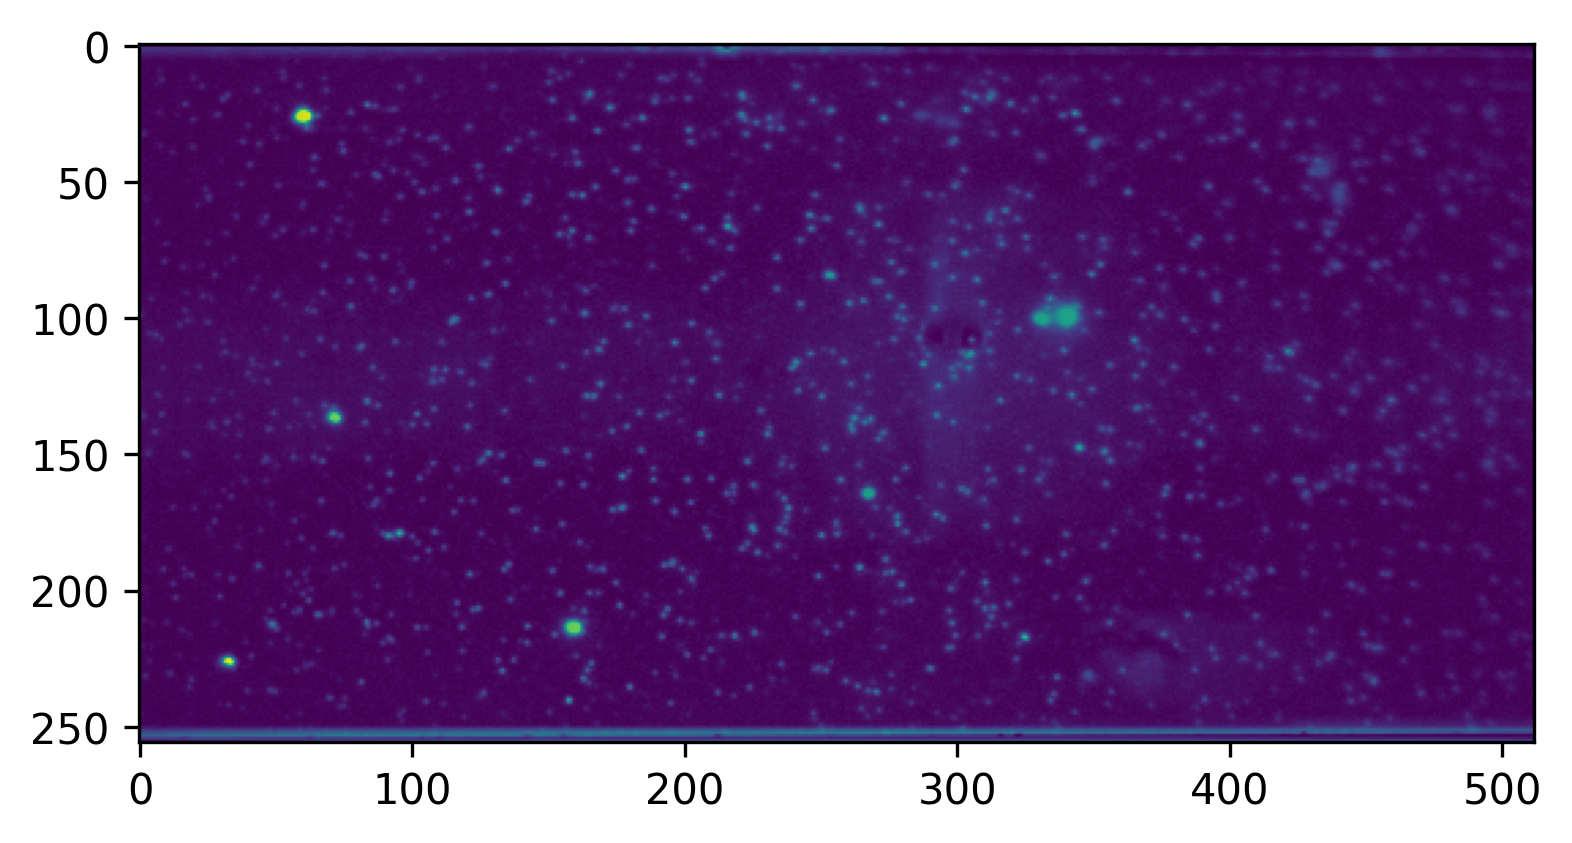

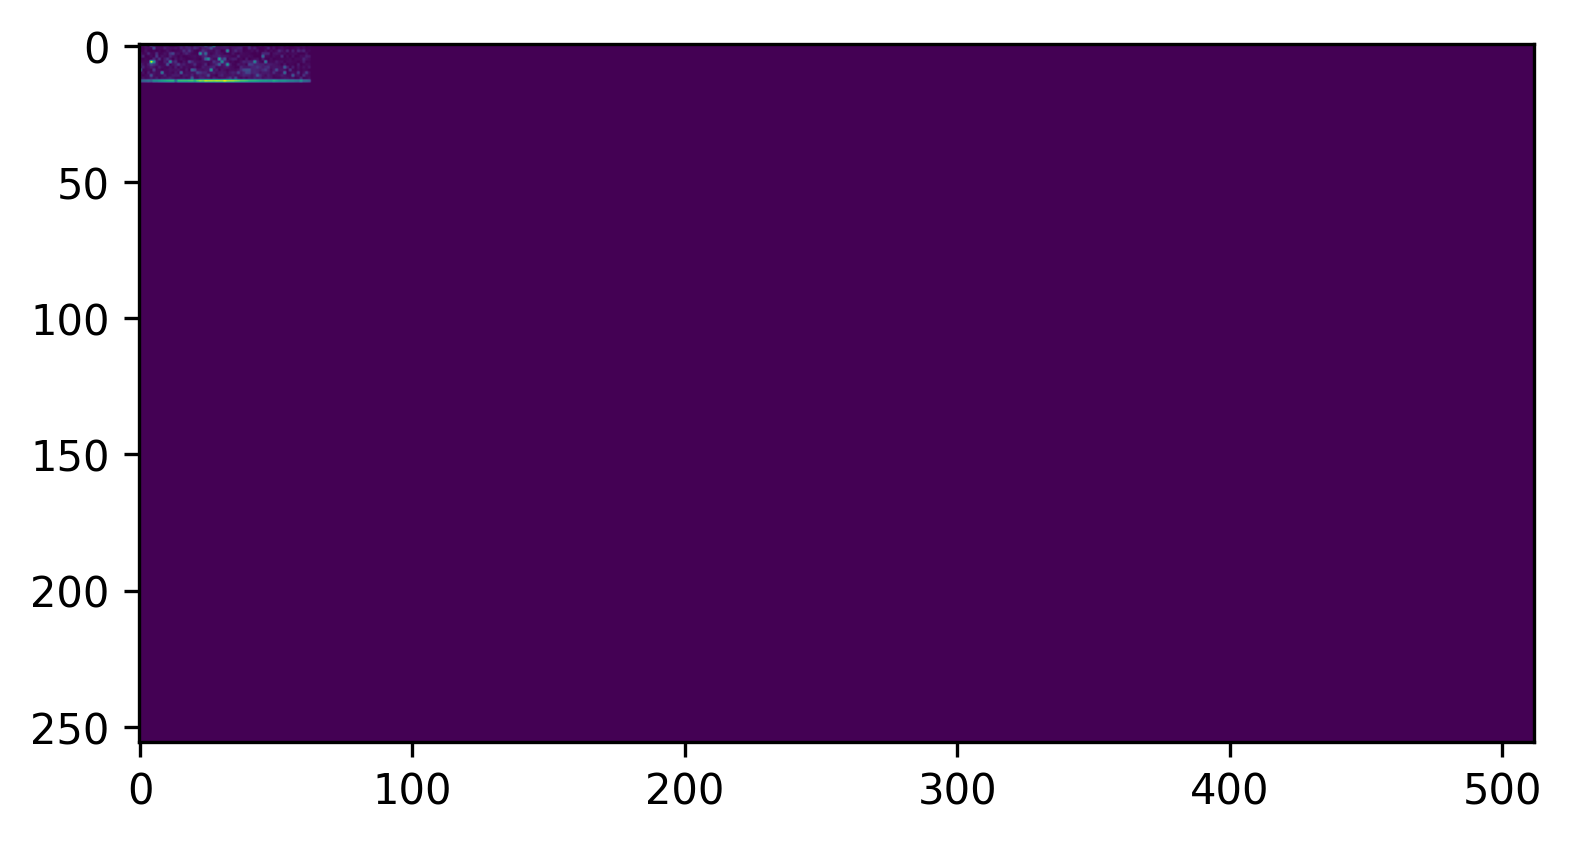

In [70]:
need_to_be_warp = Image.open('/Users/qinhanhou/Desktop/DeindlLab/0729Poly/0808/beads_movie.tif')
need_to_be_warp_np = np.array(need_to_be_warp)
plt.figure()
plt.imshow(need_to_be_warp_np)
print(need_to_be_warp_np)
print(tform_2.params)
wrapped = transform.warp(need_to_be_warp_np, tform_2, order=2)
plt.figure()
plt.imshow(wrapped)
print(wrapped)
img = Image.fromarray(wrapped)
img.save('/Users/qinhanhou/Desktop/DeindlLab/0729Poly/0808/beads_movie_warpped.tif', dpi=(300.0, 300.0))
# Image.save(wrapped, '/Users/qinhanhou/Desktop/DeindlLab/0729Poly/0808/beads_movie_warpped.tif')